In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats
from scipy import stats
from scipy.stats import pearsonr
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from scipy.stats import f_oneway
import scipy as sp
import numpy as np

def abline(axes, slope, intercept):
    """Plot a line from slope and intercept"""
    #axes = ax.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    axes.plot(x_vals, y_vals, '--')
    
import numpy as np
import scipy.stats
  
import statsmodels.api as sm
from sklearn.metrics import fbeta_score




# The exact way that these degrees of freedom are calculated depends on the statistical test you are using. Standard textbooks will describe these approaches. For example, in a standard one-way between subjects ANOVA with k
# groups and n
# participants per group, you would have k−1
# numerator degrees of freedom and kn−k
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)


    
    return f, p_value
  
def perform_regression_statistics(a, b, title):
    print(f"Regression results for: {title}")
    print("N = ", len(a))
    
    print("deg. freedom: ", len(a) * 2 - 2)
    # P-value evaluates how well your data rejects the null hypothesis, which states that there is no relationship between two compared groups.
    #a = us_mss
    #b = gt_mss
    #b = np.random.rand(10)

    # Reject the null hypothesis when the p-value is less than or equal to your significance level

    # alternative HA ‘two-sided’: the correlation is nonzero
    result = scipy.stats.pearsonr(a, b)
    print(result)
    print("C95%: ", result.confidence_interval())


    regres = linregress(a, b)
    print(regres)
    print("R2: ", r2_score(a, b))
    # perform F-test
    f, p_value = f_test(a,b)
    print(f"F(1, {len(a) * 2 - 2}) = {f} p = {p_value}")
    
    F_anova_one_way, p_anova_one_way = f_oneway(a, b)
    print(f"ANOVA one way: F={F_anova_one_way} p={p_anova_one_way}")
    
    #print("Beta scores:\n", fbeta_score(b, a, average='macro', beta=0.5))
    #print("P scores:\n", precision_score(b, a, average='macro'))
    
    
    A = sm.add_constant(a)
    mod = sm.OLS(b, A)
    res = mod.fit()
    
    print()
    print(res.summary())

    alpha = 0.05

    t_stat_two_sided, p_stat_two_sided = sp.stats.ttest_rel(a, b, alternative="two-sided")
    print(f"Paired Two-Sided T-Test: t={t_stat_two_sided} p={p_stat_two_sided}")
    
    if p_stat_two_sided < alpha:
        print(f"=> Conclusion: p={p_stat_two_sided} < alpha={alpha}, we can reject the Null-Hypothesis H0 and therefore HA: mean(us_mss) > mean(gt_mss)")
    else:
        print(f"=> Conclusion: p={p_stat_two_sided} > alpha={alpha}, we cannot reject Null-Hypothesis H0")


def run_stats(merged_statistics):
    perform_regression_statistics(b=merged_statistics.gt_step_time / 1000.0, a=merged_statistics.us_step_time / 1000.0, title="Step Time")
    perform_regression_statistics(b=merged_statistics.gt_cycle_time / 1000.0, a=merged_statistics.us_cycle_time / 1000.0, title="Cycle Time")
    perform_regression_statistics(b=merged_statistics.gt_ambulation_time / 1000.0, a=merged_statistics.us_ambulation_time / 1000.0, title="Ambulation Time")
    perform_regression_statistics(b=merged_statistics.gt_cadence, a=merged_statistics.us_cadence, title="Cadence")
    perform_regression_statistics(b=merged_statistics.gt_velocity, a=merged_statistics.us_velocity, title="Velocity")
    perform_regression_statistics(b=merged_statistics.gt_step_length, a=merged_statistics.us_step_length, title="Step Length")

q=0.75 33.0
32.86


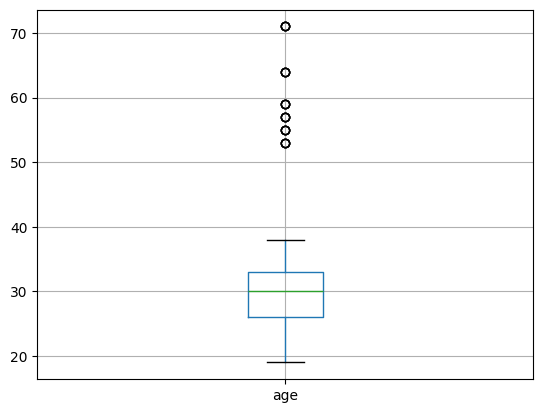

In [7]:
merged_statistics = pd.read_csv("final_gait_statistics.csv")

qval=0.75
print(f"q={qval} {np.quantile(merged_statistics.age, q=qval)}")
print(np.mean(merged_statistics.age))
plt.figure()
merged_statistics.boxplot(column=["age"])
plt.show()

In [8]:
print("all")
run_stats(merged_statistics)

all
Regression results for: Step Time
N =  200
deg. freedom:  398
PearsonRResult(statistic=0.9968318597944632, pvalue=1.1691400035999784e-219)
C95%:  ConfidenceInterval(low=0.9958132791873184, high=0.9976029291862998)
LinregressResult(slope=0.9942041039359466, intercept=0.004321229403238536, rvalue=0.996831859794463, pvalue=1.1691400036080668e-219, stderr=0.005637596533884476, intercept_stderr=0.0034404329978640776)
R2:  0.9935938132633434
F(1, 398) = 1.005293135535861 p = 0.48516707447248386
ANOVA one way: F=0.007947129590788365 p=0.9290101852055921

                            OLS Regression Results                            
Dep. Variable:           gt_step_time   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.110e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.17e-219
Time:                        17:30:14   Log-Lik

In [12]:
def report_age_group_statistics(age_cutoff):
    olders = merged_statistics[merged_statistics["age"] > age_cutoff]
    youngers = merged_statistics[merged_statistics["age"] <= age_cutoff]
    
    print("age cutoff = ", age_cutoff, " #olders = ", len(olders), " #olders = ", len(youngers))
    
    print("older")
    run_stats(olders)
    print()
    print()
    
    print("youngers")
    run_stats(youngers)
    print()
    print()

In [16]:
report_age_group_statistics(age_cutoff=32)

age cutoff =  32  #olders =  52  #olders =  148
older
Regression results for: Step Time
N =  52
deg. freedom:  102
PearsonRResult(statistic=0.998414872167746, pvalue=3.7127419772671234e-64)
C95%:  ConfidenceInterval(low=0.9972266388380857, high=0.9990942434858195)
LinregressResult(slope=0.9930111825873579, intercept=0.0038794042031434772, rvalue=0.9984148721677459, pvalue=3.712741977267191e-64, stderr=0.007916497297159878, intercept_stderr=0.00483815539476637)
R2:  0.9968081185217045
F(1, 102) = 1.0109130538715398 p = 0.4846179239527387
ANOVA one way: F=0.00024334512019233385 p=0.9875843584437891

                            OLS Regression Results                            
Dep. Variable:           gt_step_time   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.573e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.71e-64


In [17]:
report_age_group_statistics(age_cutoff=40)

age cutoff =  40  #olders =  24  #olders =  176
older
Regression results for: Step Time
N =  24
deg. freedom:  46
PearsonRResult(statistic=0.9987705271308815, pvalue=3.323423734462904e-30)
C95%:  ConfidenceInterval(low=0.99711029922877, high=0.9994771493550937)
LinregressResult(slope=0.9990546241797308, intercept=0.0007893455562070217, rvalue=0.9987705271308813, pvalue=3.323423734469508e-30, stderr=0.010571901763914465, intercept_stderr=0.006654221390012059)
R2:  0.9975379231671049
F(1, 46) = 0.9994313491009988 p = 0.5005382623281768
ANOVA one way: F=2.702588501665549e-05 p=0.9958745824212318

                            OLS Regression Results                            
Dep. Variable:           gt_step_time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     8930.
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.32e-30
Time

In [20]:
report_age_group_statistics(age_cutoff=50)

age cutoff =  50  #olders =  24  #olders =  176
older
Regression results for: Step Time
N =  24
deg. freedom:  46
PearsonRResult(statistic=0.9987705271308815, pvalue=3.323423734462904e-30)
C95%:  ConfidenceInterval(low=0.99711029922877, high=0.9994771493550937)
LinregressResult(slope=0.9990546241797308, intercept=0.0007893455562070217, rvalue=0.9987705271308813, pvalue=3.323423734469508e-30, stderr=0.010571901763914465, intercept_stderr=0.006654221390012059)
R2:  0.9975379231671049
F(1, 46) = 0.9994313491009988 p = 0.5005382623281768
ANOVA one way: F=2.702588501665549e-05 p=0.9958745824212318

                            OLS Regression Results                            
Dep. Variable:           gt_step_time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     8930.
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.32e-30
Time